# Clim680 Project

In [2]:
# Importing the necessary modules
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.colors as colors

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import time

from matplotlib import cm
import matplotlib.cbook as cbook

import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

## Air Temperature

In [3]:
path1 = '/scratch/nblancoa/clim_680_dataset/'
fname1 = 'air.mon.mean.v401.nc'
ds_air = xr.open_dataset(path1+fname1)
ds_air

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1380)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2014-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    Source:         http://climate.geog.udel.edu/~climate/html_pages/Global2_...
    version:        4.01
    history:        created 2/2016 by CAS NOAA/ESRL PSD
    title:          Terrestrial Air Temperature and Precipitation: V4.01
    dataset_title:  Terrestrial Air Temperature and Precipitation: 1900-2014 ...
    source:         http://climate.geog.udel.edu/~climate/
    References:     https://www.psl.noaa.gov/data/gridded/data.UDel_AirT_Prec...

In [4]:
# Calculating the mean temperatures
ds_mean_air=ds_air.mean(dim='time')
ds_mean_air

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Data variables:
    air      (lat, lon) float32 nan nan nan nan ... -49.31 -49.32 -49.32 -49.31

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


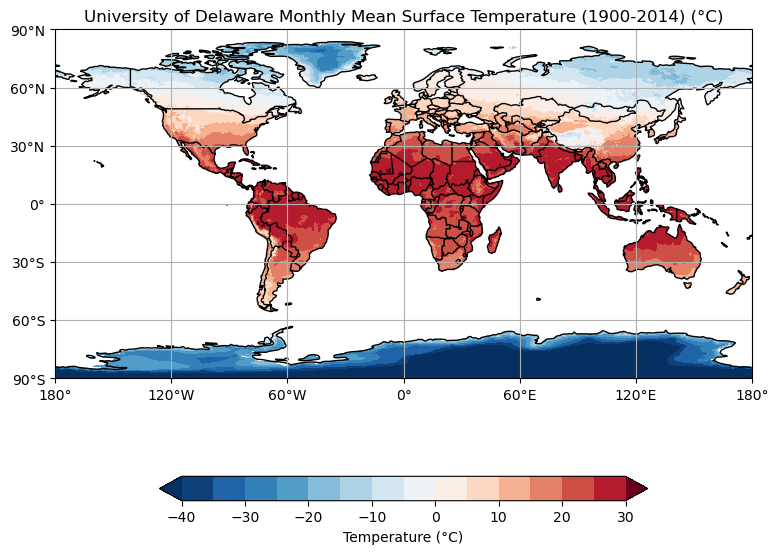

In [5]:
#Plotting Monthly Mean Surface Temperature from 1900-2014

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

clevs = np.arange(-40,35,5)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

z = np.linspace(-40,35,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())


# Add cyclic point to data
data=ds_mean_air['air']
data, lons = add_cyclic_point(data, coord=ds_air['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_air['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='RdBu_r',norm=divnorm, extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Adding borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Temperature (°C)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('University of Delaware Monthly Mean Surface Temperature (1900-2014) (°C)')
;

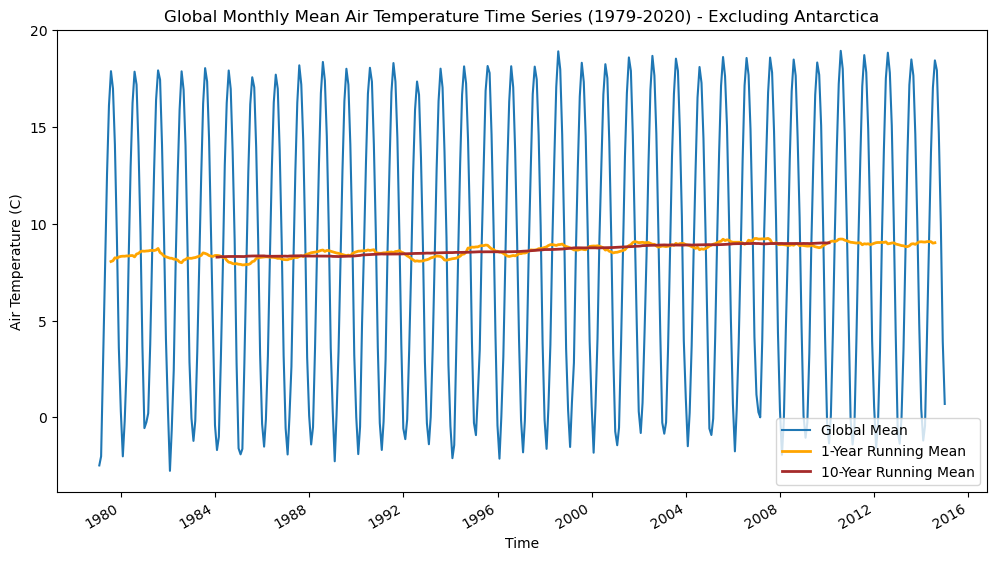

In [6]:
# Plotting Time series of Global Monthly Mean Air temperature from 1979-2014

# Slice the dataset to start from January 1979
ds_air = ds_air.sel(time=slice('1979-01', None))

# Create a latitude mask to exclude Antarctica
lat_mask = (ds_air['lat'] < -60)

# Calculate monthly means
ds_monthly_mean = ds_air.resample(time='M').mean(dim='time')

# Extract the air temperature variable
air_temperature = ds_monthly_mean['air']

# Apply the latitude mask
air_temperature = air_temperature.where(~lat_mask, np.nan)

# Calculate the global mean
global_mean = air_temperature.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Air Temperature Time Series (1979-2020) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Air Temperature (C)')


plt.legend()
plt.show()


In [7]:
# Subset the data to include only the years 1979-2000
ds_1979_2000 = ds_air.sel(time=slice('1979-01-01', '2000-12-31'))
ds_mean2 = ds_1979_2000.mean(dim='time')
ds_1979_2000

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 264)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2000-12-01
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan ... -26.8 -26.8 -26.7
Attributes:
    Conventions:    CF-1.0
    Source:         http://climate.geog.udel.edu/~climate/html_pages/Global2_...
    version:        4.01
    history:        created 2/2016 by CAS NOAA/ESRL PSD
    title:          Terrestrial Air Temperature and Precipitation: V4.01
    dataset_title:  Terrestrial Air Temperature and Precipitation: 1900-2014 ...
    source:         http://climate.geog.udel.edu/~climate/
    References:     https://www.psl.noaa.gov/data/gridded/data.UDel_AirT_Prec...

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


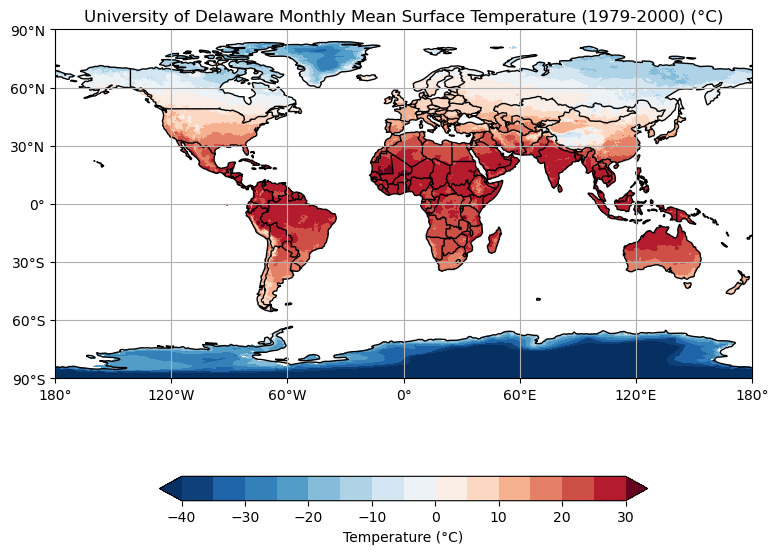

In [8]:
# Plotting Monthly Mean Surface Temperature from 1979-2000

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

clevs = np.arange(-40,35,5)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

z = np.linspace(-40,35,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())


# Add cyclic point to data
data2=ds_mean2['air']
data2, lons = add_cyclic_point(data2, coord=ds_mean2['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_air['lat'], data2,clevs,
            transform = ccrs.PlateCarree(),cmap='RdBu_r',norm=divnorm, extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Adding borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Temperature (°C)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('University of Delaware Monthly Mean Surface Temperature (1979-2000) (°C)')
;

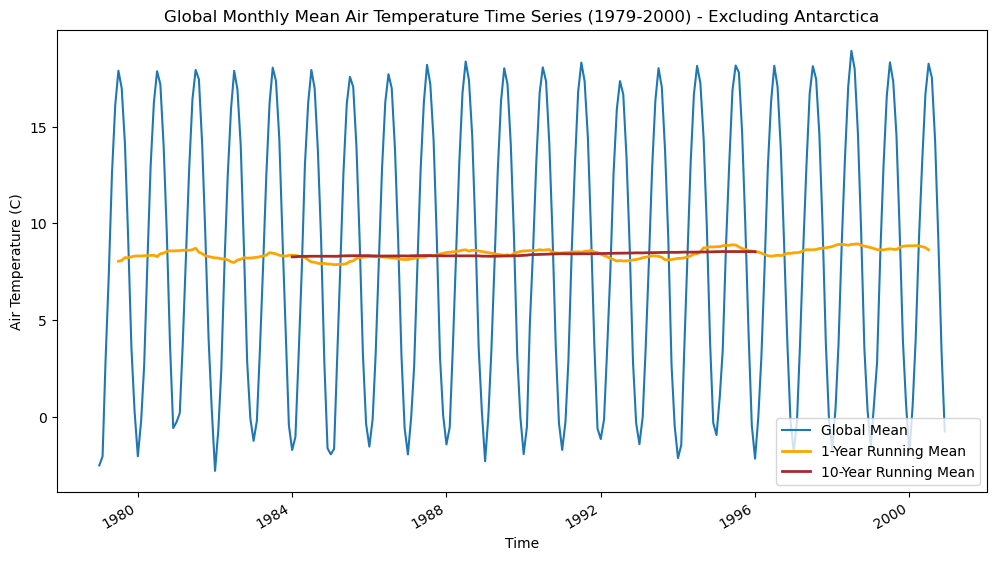

In [9]:
# Plotting time series of Monthly Mean Air Temperature from 1979-2000

# Extract the air temperature variable
air_temperature = ds_1979_2000['air']

# Convert the time coordinate to datetime64
ds_1979_2000['time'] = pd.to_datetime(ds_1979_2000['time'].values)

# Create a latitude mask to exclude Antarctica
lat_mask = (ds_air['lat'] < -60)

# Calculate monthly means
ds_monthly_mean = ds_air.resample(time='M').mean(dim='time')

# Apply the latitude mask
air_temperature = air_temperature.where(~lat_mask, np.nan)

# Calculate the global mean
global_mean = air_temperature.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Air Temperature Time Series (1979-2000) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Air Temperature (C)')

plt.legend()
plt.show()


In [10]:
# Slicing time from 2000-2014
ds_2000_2014 = ds_air.sel(time=slice('2000-01-01', '2014-12-31'))
ds_mean3 = ds_2000_2014.mean(dim='time')
ds_2000_2014

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 180)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2014-12-01
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan ... -26.4 -26.4 -26.3
Attributes:
    Conventions:    CF-1.0
    Source:         http://climate.geog.udel.edu/~climate/html_pages/Global2_...
    version:        4.01
    history:        created 2/2016 by CAS NOAA/ESRL PSD
    title:          Terrestrial Air Temperature and Precipitation: V4.01
    dataset_title:  Terrestrial Air Temperature and Precipitation: 1900-2014 ...
    source:         http://climate.geog.udel.edu/~climate/
    References:     https://www.psl.noaa.gov/data/gridded/data.UDel_AirT_Prec...

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


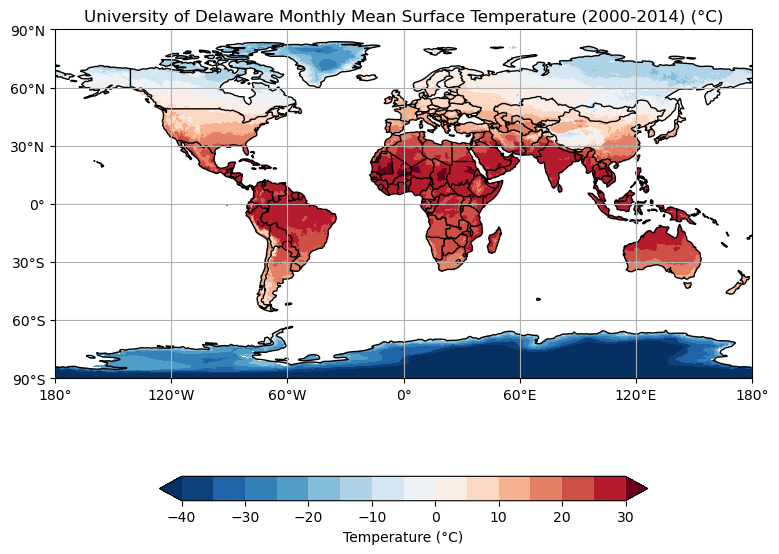

In [11]:
# Plotting Monthly Mean Surface Temperature from 2000-2014

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

clevs = np.arange(-40,35,5)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

z = np.linspace(-40,35,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())


# Add cyclic point to data
data3=ds_mean3['air']
data3, lons = add_cyclic_point(data3, coord=ds_mean3['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean3['lat'], data3,clevs,
            transform = ccrs.PlateCarree(),cmap='RdBu_r',norm=divnorm, extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Adding borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Temperature (°C)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('University of Delaware Monthly Mean Surface Temperature (2000-2014) (°C)')
;

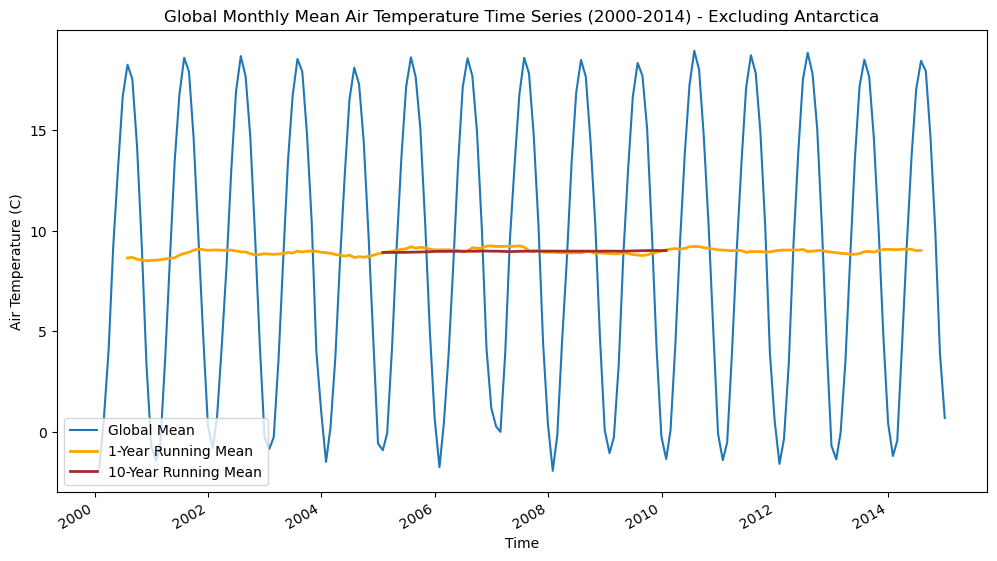

In [12]:
# Plotting time series of Monthly Mean Air Temperature from 2000-2014

# Create a latitude mask to exclude Antarctica
lat_mask = (ds_2000_2014['lat'] < -60)

# Calculate monthly means
ds_monthly_mean = ds_2000_2014.resample(time='M').mean(dim='time')

# Extract the air temperature variable
air_temperature = ds_monthly_mean['air']

# Apply the latitude mask
air_temperature = air_temperature.where(~lat_mask, np.nan)

# Calculate the global mean
global_mean = air_temperature.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Air Temperature Time Series (2000-2014) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Air Temperature (C)')

plt.legend()
plt.show()


In [13]:
# Calculating the difference between temperature data in 2014 and precipitation data in 1979
ds_temp_mean_diff = ds_mean3- ds_mean2

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


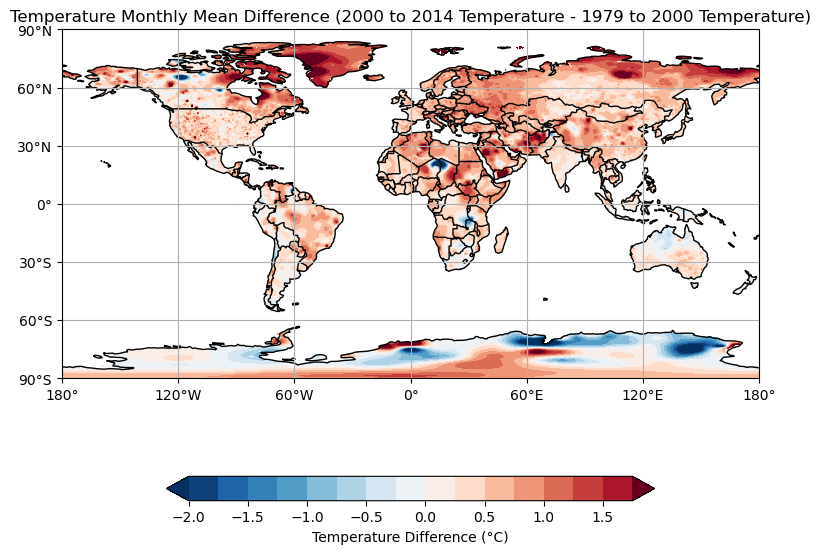

In [14]:
# Plotting the difference between temperature data in the second time period (2000-2014) 
# and precipitation data in the first time period (1979-2000).
data_temp_mean_diff = ds_temp_mean_diff['air'].values

# Make the figure larger
fig = plt.figure(figsize=(9, 8.5))
clevs = np.arange(-2, 2, 0.25)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())
divnorm = colors.CenteredNorm(vcenter=0)

# Add cyclic point to data
data_temp_mean_diff, lons = add_cyclic_point(data_temp_mean_diff, coord=ds_temp_mean_diff['lon'])

# Make a filled contour plot
cs = ax.contourf(lons, ds_temp_mean_diff['lat'], data_temp_mean_diff, clevs,
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=divnorm, extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(cfeature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs, shrink=0.7, orientation='horizontal', label='Temperature Difference (°C)')
# divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('Temperature Monthly Mean Difference (2000 to 2014 Temperature - 1979 to 2000 Temperature)')

plt.show()


## Precipitation

In [15]:
path = '/scratch/nblancoa/clim_680_dataset/'
fname = 'GPCP_precip.mon.mean.nc'
ds_precip = xr.open_dataset(path+fname)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 496, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [16]:
#Calculating the mean precipitation
ds_mean_precip=ds_precip.mean(dim='time')
ds_mean_precip

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds  (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip    (lat, lon) float32 0.3066 0.3005 0.2959 ... 0.5004 0.504 0.5062

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


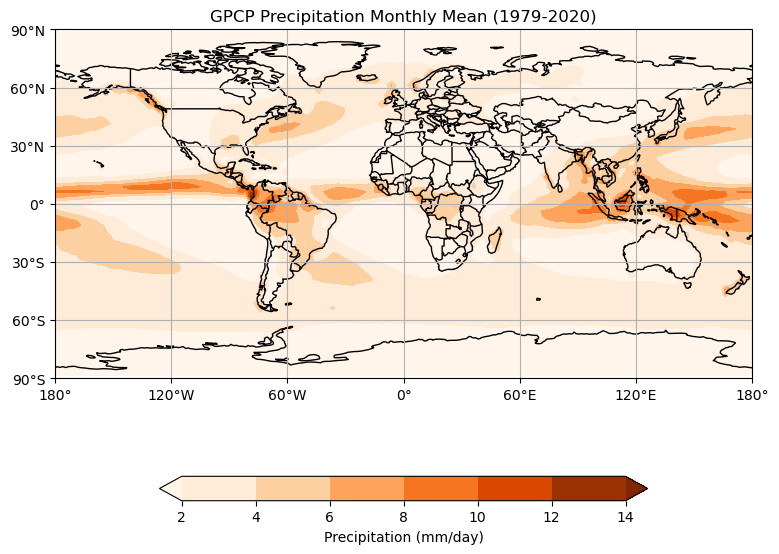

In [17]:
# Plotting Monthly Mean Precipitation from 1979-2020

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())



# Add cyclic point to data
data3=ds_mean_precip['precip']
data3, lons = add_cyclic_point(data3, coord=ds_precip['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_precip['lat'], data3,
            transform = ccrs.PlateCarree(),cmap='Oranges',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation (mm/day)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('GPCP Precipitation Monthly Mean (1979-2020)')
;

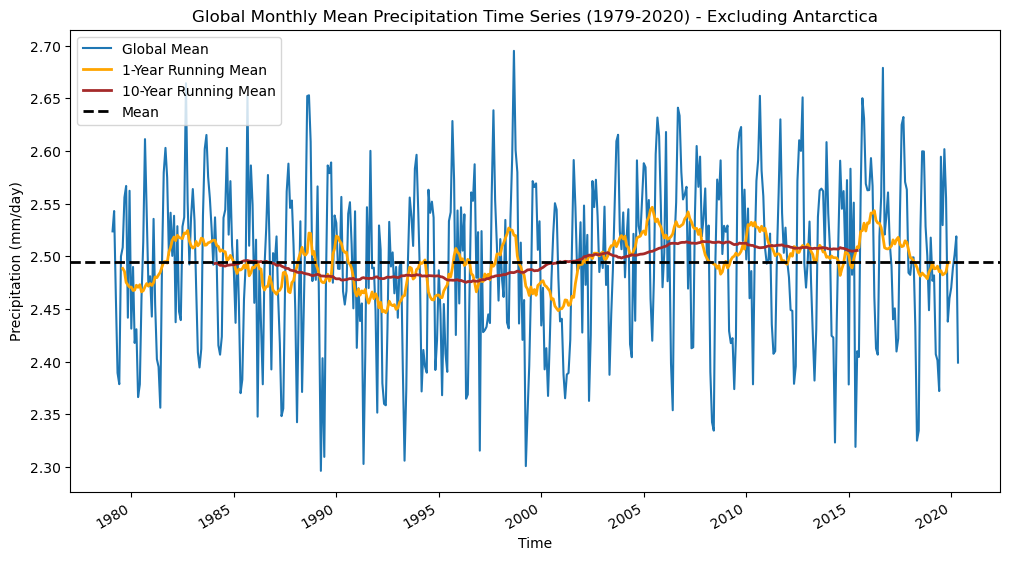

In [18]:
# Plotting Precipitation Time Series 1979-2020

# Convert the time coordinate to datetime64
ds_precip['time'] = pd.to_datetime(ds_precip['time'].values)
# Calculate monthly means
ds_monthly_mean = ds_precip.resample(time='M').mean(dim='time')
# Slice the dataset to start from January 1979
ds_precip = ds_precip.sel(time=slice('1979-01', None))
# Extract the air temperature variable
precip = ds_monthly_mean['precip']
# Create a latitude mask to exclude Antarctica
lat_mask = (ds_precip['lat'] < -60)
# Apply the latitude mask
precip = precip.where(~lat_mask, np.nan)


# Calculate the global mean
global_mean = precip.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Precipitation Time Series (1979-2020) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')

# Add a line indicating the mean
plt.axhline(global_mean.mean(), color='black', linestyle='dashed', label='Mean', linewidth=2)

plt.legend()
plt.show()



In [19]:
# Slicing precipitation data from 1979-2000
ds_precip_1979_2000 = ds_precip.sel(time=slice('1979-01-01', '2000-12-31'))
ds_mean_precip_1979 = ds_precip_1979_2000.mean(dim='time')
ds_mean_precip_1979

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds  (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip    (lat, lon) float32 0.3237 0.3147 0.3077 ... 0.458 0.4586 0.4671

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


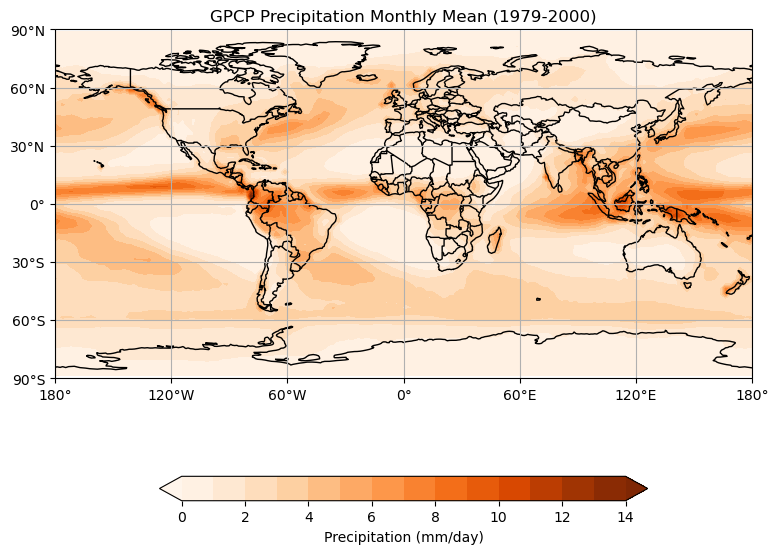

In [20]:
# # Plotting Monthly Mean Precipitation from 1979-2000

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

clevs = np.arange(0,15,1)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())



# Add cyclic point to data
data_precip_1979=ds_mean_precip_1979['precip']
data_precip_1979, lons = add_cyclic_point(data_precip_1979, coord=ds_mean_precip_1979['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean_precip_1979['lat'], data_precip_1979,clevs,
            transform = ccrs.PlateCarree(),cmap='Oranges',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation (mm/day)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('GPCP Precipitation Monthly Mean (1979-2000)')
;

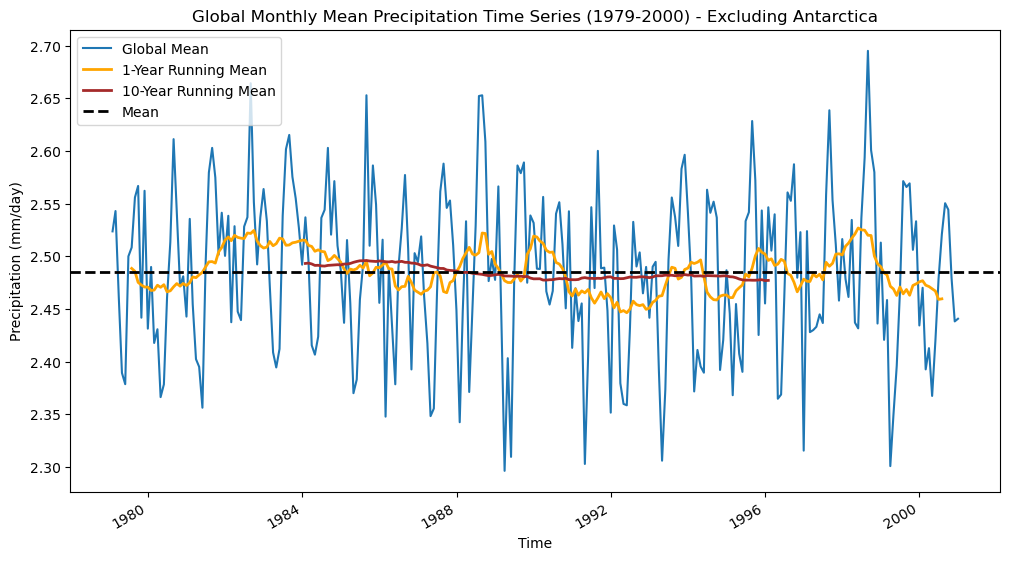

In [21]:
# Plotting Precipitation Time Series 1979-2000

# Convert the time coordinate to datetime64
ds_precip_1979_2000['time'] = pd.to_datetime(ds_precip_1979_2000['time'].values)


# Create a latitude mask to exclude Antarctica
lat_mask = (ds_precip['lat'] < -60)

# Calculate monthly means
ds_monthly_mean = ds_precip_1979_2000.resample(time='M').mean(dim='time')

# Extract the air temperature variable
precip = ds_monthly_mean['precip']

# Apply the latitude mask
precip = precip.where(~lat_mask, np.nan)

# Calculate the global mean
global_mean = precip.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Precipitation Time Series (1979-2000) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')

# Add a line indicating the mean
plt.axhline(global_mean.mean(), color='black', linestyle='dashed', label='Mean', linewidth=2)

plt.legend()
plt.show()



In [22]:
# Slicing precipitation data from 2000-2014
ds_precip_2000_2014 = ds_precip.sel(time=slice('2000-01-01', '2014-12-31'))
ds_mean_precip_2014 = ds_precip_2000_2014.mean(dim='time')
ds_mean_precip_2014

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds  (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip    (lat, lon) float32 0.2732 0.2718 0.2705 ... 0.5172 0.5227 0.5213

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


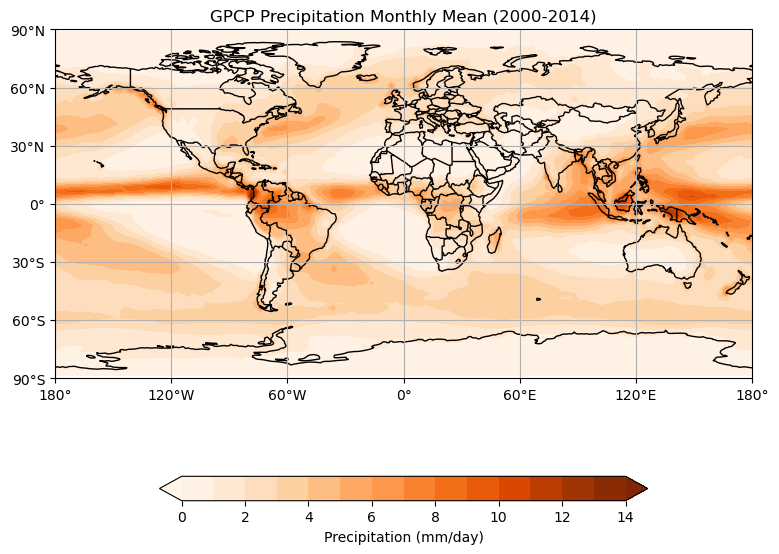

In [23]:
# Plotting precipitation monthly mean from 2000-2014

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))
clevs = np.arange(0,15,1)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())



# Add cyclic point to data
data_precip_2014=ds_mean_precip_2014['precip']
data_precip_2014, lons = add_cyclic_point(data_precip_2014, coord=ds_mean_precip_2014['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean_precip_1979['lat'], data_precip_2014,clevs,
            transform = ccrs.PlateCarree(),cmap='Oranges',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation (mm/day)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('GPCP Precipitation Monthly Mean (2000-2014)')
;

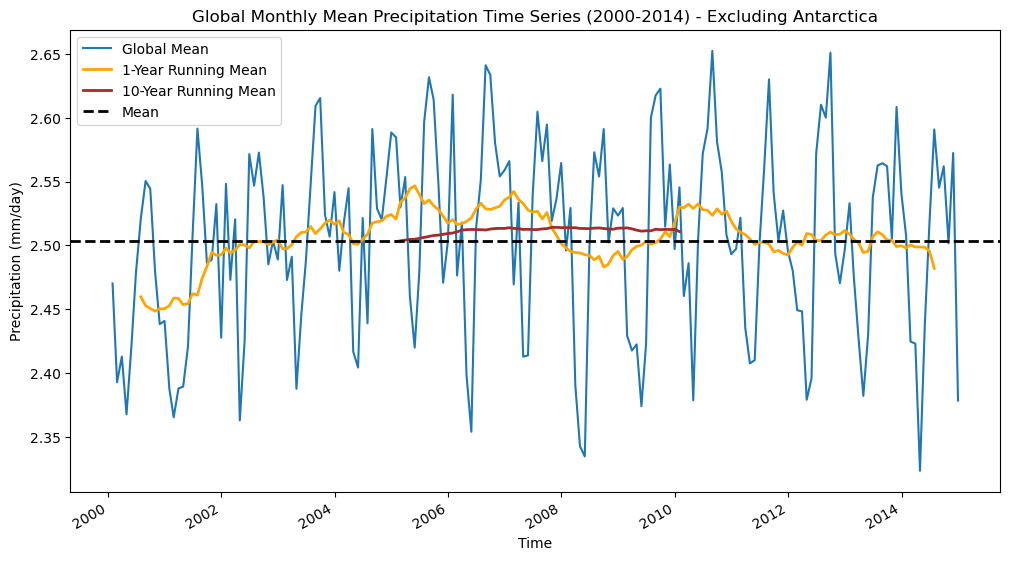

In [24]:
# Plotting Precipitation Time Series 2000-2014

# Convert the time coordinate to datetime64
ds_precip_2000_2014['time'] = pd.to_datetime(ds_precip_2000_2014['time'].values)


# Create a latitude mask to exclude Antarctica
lat_mask = (ds_precip['lat'] < -60)

# Calculate monthly means
ds_monthly_mean = ds_precip_2000_2014.resample(time='M').mean(dim='time')

# Extract the air temperature variable
precip = ds_monthly_mean['precip']

# Apply the latitude mask
precip = precip.where(~lat_mask, np.nan)

# Calculate the global mean
global_mean = precip.mean(dim=['lat', 'lon'])

# Calculate the 1-year running mean
rolling_mean_1y = global_mean.rolling(time=12, center=True).mean()
# Calculate the 10-year running mean
rolling_mean_10y = global_mean.rolling(time=120, center=True).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
global_mean.plot(label='Global Mean')
rolling_mean_1y.plot(label='1-Year Running Mean', color='orange', linewidth=2)
rolling_mean_10y.plot(label='10-Year Running Mean', color='brown', linewidth=2)
plt.title('Global Monthly Mean Precipitation Time Series (2000-2014) - Excluding Antarctica')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')

# Add a line indicating the mean
plt.axhline(global_mean.mean(), color='black', linestyle='dashed', label='Mean', linewidth=2)

plt.legend()
plt.show()

In [25]:
# Calculating the difference between precipitation data in 2014 and precipitation data in 1979
ds_precip_mean_diff = ds_mean_precip_2014- ds_mean_precip_1979

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


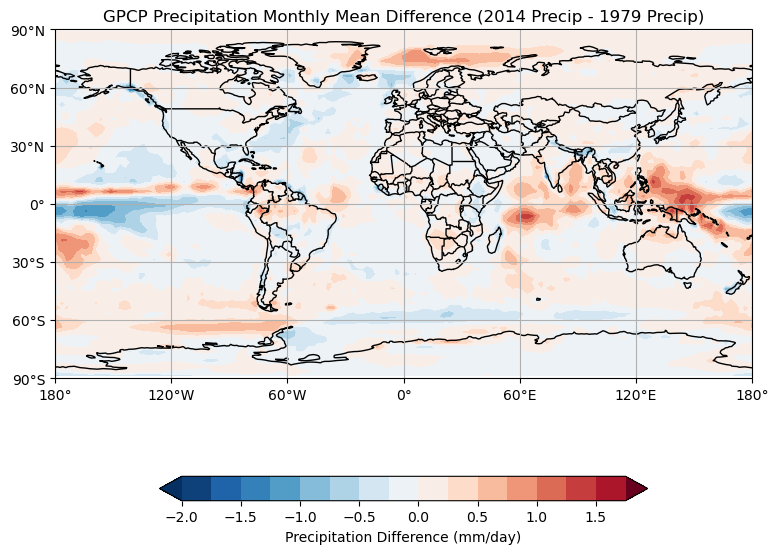

In [26]:
# Plotting the difference between precipitation data in the second time period (2000-2014) 
# and precipitation data in the first time period (1979-2000).

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))
clevs = np.arange(-2,2,0.25)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
divnorm = colors.CenteredNorm(vcenter=0)



# Add cyclic point to data
data_precip_mean_diff=ds_precip_mean_diff['precip']
data_precip_mean_diff, lons = add_cyclic_point(data_precip_mean_diff, coord=ds_precip_mean_diff['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_precip_mean_diff['lat'], data_precip_mean_diff,clevs,
            transform = ccrs.PlateCarree(),cmap='RdBu_r',norm=divnorm,
            extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation Difference (mm/day)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('GPCP Precipitation Monthly Mean Difference (2014 Precip - 1979 Precip)')
;

## Precipitation Anomalies

In [27]:
ds_precip_climo = ds_precip.groupby('time.month').mean(dim='time')
ds_precip_anoms = ds_precip.groupby('time.month')-ds_precip_climo

''

/home/nblancoa/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


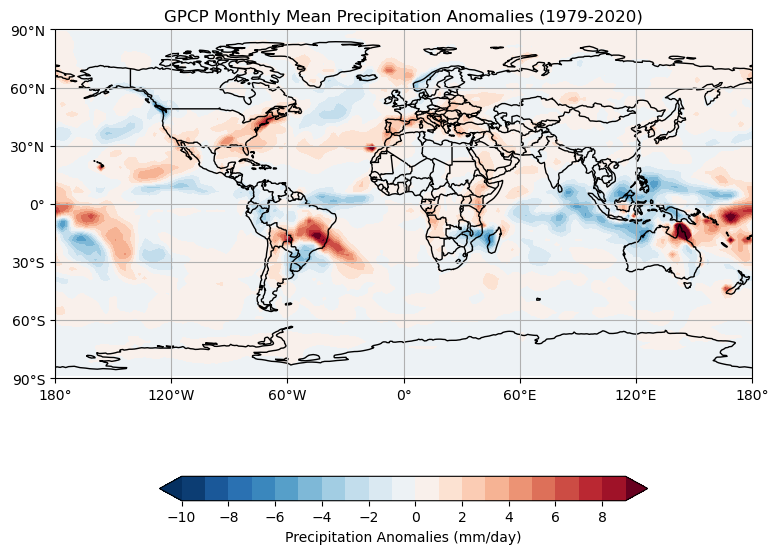

In [28]:
# Plotting Monthly Mean Precipitation Anomalies from 1979-2020 

# Make the figure larger
fig = plt.figure(figsize=(9,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

clevs = np.arange(-10,10,1)

z = np.linspace(-10,10,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())

# Add cyclic point to data
data4=ds_precip_anoms['precip'][0,:,:]
data4, lons = add_cyclic_point(data4, coord=ds_precip_anoms['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_precip_anoms['lat'], data4,clevs,
            transform = ccrs.PlateCarree(),cmap='RdBu_r',norm=divnorm,extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add borders
ax.add_feature(feature.BORDERS, zorder=2, color='k')

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation Anomalies (mm/day)')
#divnorm = colors.CenteredNorm(vcenter=0)

# Add title
plt.title('GPCP Monthly Mean Precipitation Anomalies (1979-2020)')
;

/tmp/ipykernel_1076746/1320432004.py:48: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,


''

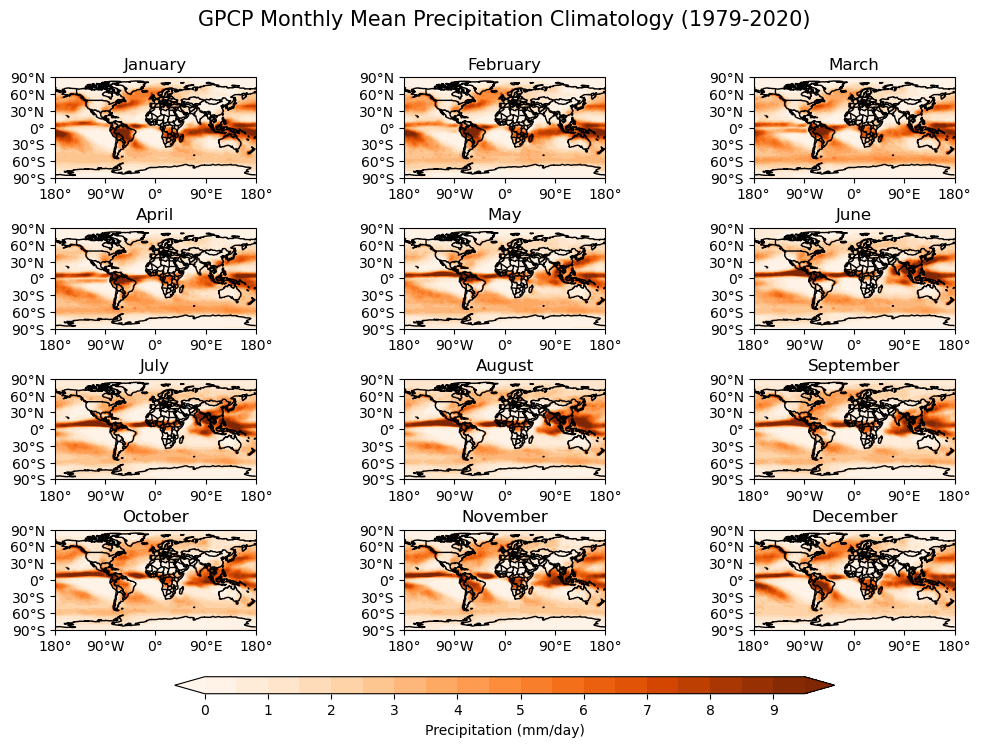

In [29]:
# Plotting a 12-month climatology subplot for monthly mean precipitation from 1979-2020


# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5),  layout='constrained')

axs=axs.flatten()
clevs = np.arange(0,10,0.5)
z = np.linspace(-1,10,50*50).reshape(50,50)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']


for i, mon in enumerate(ds_precip_climo['month']):
        data5 = ds_precip_climo['precip'].sel(month=mon)
        # Rest of your loop code


        # Add the cyclic point
        data5,lons=add_cyclic_point(data5,coord=ds_precip_climo['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_precip_climo['lat'],data5,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='Oranges',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,90), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
          # Title each subplot with the name of the season
        axs[i].set_title(months[i])

          # Draw the coastines for each subplot
        axs[i].coastlines()
        
        # Add borders
        axs[i].add_feature(feature.BORDERS, zorder=1, color='k')
       
        
# Adjust the location of the subplots 
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Precipitation (mm/day)')

# Add a big title at the top
plt.suptitle('GPCP Monthly Mean Precipitation Climatology (1979-2020)',fontsize=15)
;

## Correlation

In [30]:
# Defining a function to automatically add latitude and longitude tick labels.

def label_latlon(ax,lons,lats):
    """ Add tick labels """
    # Define the xticks for longtitude
    ax.set_xticks(lons,crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Define ytick for latitude
    ax.set_yticks(lats,crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    return

In [31]:
# Creating a correlation for both temperature and precipitation
ds_corr_temp = ds_air.air.sel(time=slice(ds_precip['time'][0],ds_precip['time'][-1]))
ds_corr_precip = ds_precip.precip.sel(time=slice(ds_air['time'][0],ds_air['time'][-1]))            

In [32]:
# Calculating climatology and anomalies for both precipitation and temperature data.
da_climo_temp = ds_corr_temp.groupby('time.month').mean()
da_anoms_temp = ds_corr_temp.groupby('time.month')-da_climo_temp
da_climo_precip = ds_corr_precip.groupby('time.month').mean()
da_anoms_precip = ds_corr_precip.groupby('time.month')-da_climo_precip
da_anoms_precip

<xarray.DataArray 'precip' (time: 432, lat: 72, lon: 144)>
array([[[-0.01874784, -0.02977944, -0.03341371, ..., -0.02630229,
         -0.02191499, -0.01578865],
        [-0.0157379 , -0.01605584, -0.01938402, ..., -0.02540407,
         -0.02357926, -0.02034535],
        [-0.02316869, -0.02316348, -0.02746402, ..., -0.03410454,
         -0.03011248, -0.02573639],
        ...,
        [ 0.36336613,  0.33411556,  0.23352867, ...,  0.31571943,
          0.24302977,  0.3018617 ],
        [ 0.25239074,  0.25663072,  0.1827277 , ...,  0.22488192,
          0.24412993,  0.25826508],
        [ 0.17883897,  0.13193199,  0.1594491 , ...,  0.11295339,
          0.15626746,  0.22453812]],

       [[ 0.2570306 ,  0.24626845,  0.23710757, ...,  0.23789945,
          0.22821437,  0.23399353],
        [ 0.19919948,  0.21918392,  0.22280976, ...,  0.20702532,
          0.20766023,  0.21441036],
        [ 0.00861621,  0.01726647,  0.01156262, ...,  0.08866449,
          0.10856287,  0.04000483],
...
        [-0.02370465, -0.01145387, -0.0014292 , ..., -0.05942982,
         -0.0626359 , -0.0233106 ],
        [ 0.11326045,  0.09425235,  0.10637492, ...,  0.0815151 ,
          0.07876554,  0.09738845],
        [ 0.22736526,  0.23152077,  0.26860702, ...,  0.20454681,
          0.25015792,  0.21054417]],

       [[ 0.1043828 ,  0.10210362,  0.11583427, ...,  0.10072516,
          0.10341193,  0.1051856 ],
        [ 0.19039391,  0.18727365,  0.17865166, ...,  0.20536713,
          0.17405184,  0.17628677],
        [ 0.07563928,  0.08148545,  0.0848005 , ...,  0.10761382,
          0.0854442 ,  0.08288404],
        ...,
        [ 0.09855568,  0.11206073,  0.12941241, ...,  0.0711323 ,
          0.08346438,  0.08095866],
        [-0.08695406, -0.07579955, -0.07138816, ..., -0.12063718,
         -0.08097413, -0.08537403],
        [ 0.11306345,  0.14465025,  0.15783983, ...,  0.10959736,
          0.06421411,  0.12834695]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2014-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [33]:
# Creating the correlation variable between precipitation and temperature
r_map = xr.corr(da_anoms_precip,da_anoms_temp,dim='time')

In [34]:
# # Picking a point (equator) from the precip anomalies
# pt=da_anoms_precip.sel(lat=0,lon=360-180,method='nearest')
nx = len(da_anoms_precip['lon'])
ny = len(da_anoms_precip['lat'])

p_array = np.zeros((ny, nx))
r_array = np.zeros((ny, nx))


for i in range(nx):
    for j in range(ny):
        # Select the time series for the current grid point
        temp_values = da_anoms_temp.isel(lon=i, lat=j).values
        precip_values = da_anoms_precip[:, j, i].values

        # Check for missing or invalid values
        valid_indices = np.isfinite(temp_values) & np.isfinite(precip_values)

        # Ensure that the length is at least 2 before calculating correlation
        if np.sum(valid_indices) >= 2:
            # Calculate the correlation and p-value
            r, p = pearsonr(temp_values[valid_indices], precip_values[valid_indices])

            # Store the results in the arrays
            r_array[j, i] = r
            p_array[j, i] = p





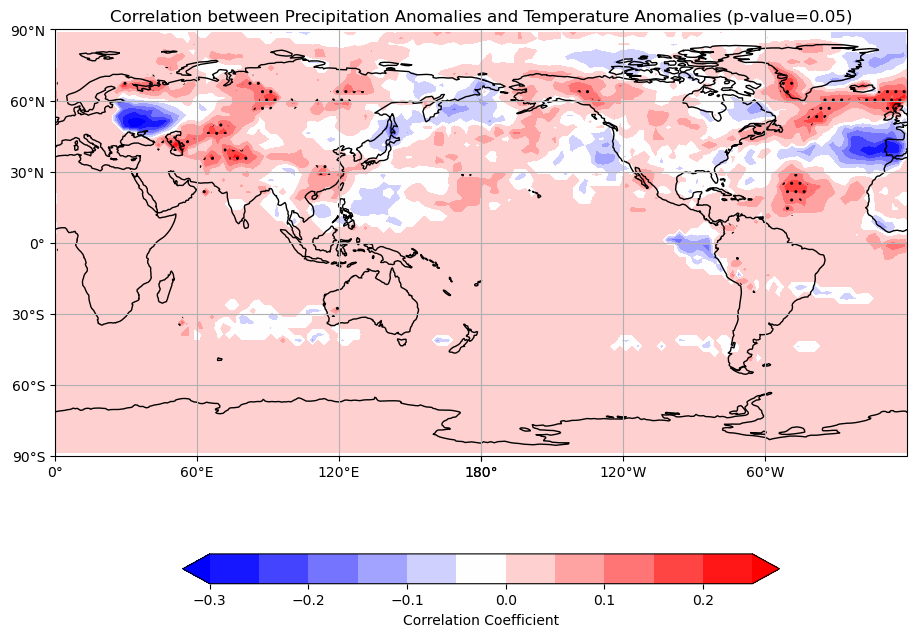

In [35]:
# Plotting the correlation of precipitation and temperature with significance (p-value = 0.05)

mask_sig=np.where(p_array<0.05,r_array,np.nan)
clevs=np.arange(-0.3,.3,0.05)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_array
data,lon=add_cyclic_point(data,coord=da_anoms_precip['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=da_anoms_precip['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,da_anoms_precip['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,da_anoms_precip['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['','..'],
            extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Precipitation Anomalies and Temperature Anomalies (p-value=0.05)') ;

## Niño 3.4

In [36]:
file_nino34='/scratch/nblancoa/clim_680_dataset/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [37]:
path = '/scratch/nblancoa/clim_680_dataset/'
fname = 'GPCP_precip.mon.mean.nc'
ds_precip = xr.open_dataset(path+fname)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 496, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [38]:
# Slicing the precipitation data to match the time with the Nino3.4 data.

da_precip = ds_precip.precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))

# Calulating climatology and anomalies for precipitation again
da_climo_precip = da_precip.groupby('time.month').mean()
da_anoms_precip = da_precip.groupby('time.month')-da_climo_precip
# Defining conditions for El Nino, La Nina, and Neutral conditions
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

# Adding a counter for the amount of times each situation occurs
counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]

In [39]:
# Making a composite of each situation with precipitation
elnino_precip = da_anoms_precip.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip = da_anoms_precip.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip = da_anoms_precip.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')
comp_precip = [elnino_precip,lanina_precip,neutral_precip]

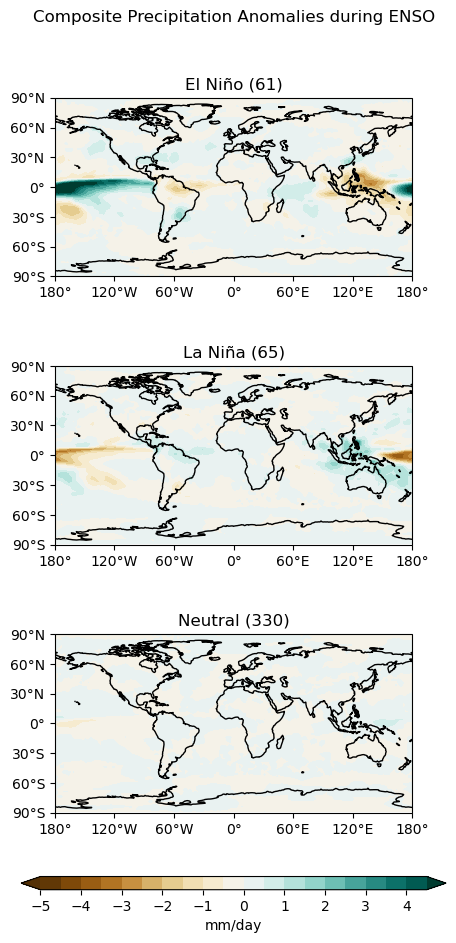

In [40]:
#Creating a multi-panel plot for precipitation anomalies during ENSO

labels=['El Niño','La Niña', 'Neutral']
clevs = np.arange(-5,5,0.5)

z = np.linspace(-5,5,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data = comp_precip[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both',norm=divnorm)

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO') ;

In [41]:
# Slicing the temperature data to match the time with the Nino3.4 data.
da_temp = ds_air.air.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
# Calulating climatology and anomalies for temperature again
da_climo_air = ds_air.groupby('time.month').mean()
da_anoms_air = ds_air.groupby('time.month')-da_climo_air

In [42]:
# Making a composite of each situation with temperature 
elnino_air = da_anoms_air.sel(time=elnino.dropna(dim='time')['time'],method="nearest").mean(dim='time')
lanina_air = da_anoms_air.sel(time=lanina.dropna(dim='time')['time'],method="nearest").mean(dim='time')
neutral_air = da_anoms_air.sel(time=neutral.dropna(dim='time')['time'],method="nearest").mean(dim='time')

comp_air = [elnino_air,lanina_air,neutral_air]

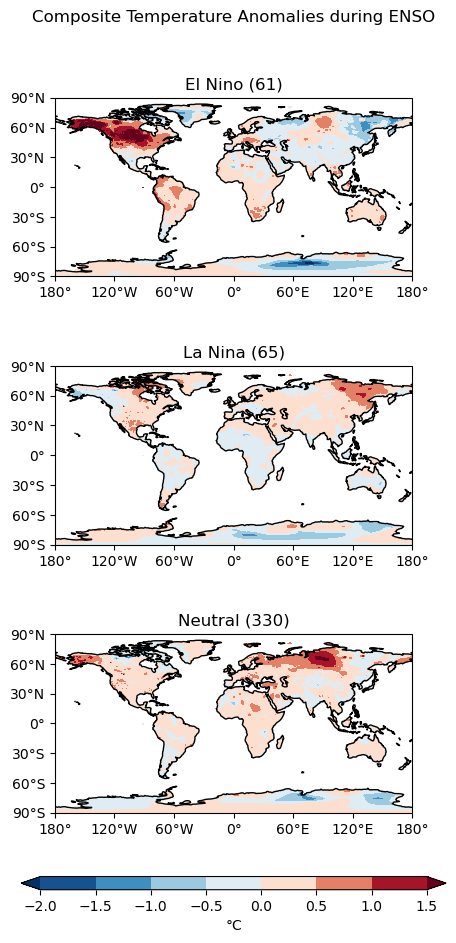

In [43]:
#Creating a multi-panel plot for composite temperature anomalies during ENSO

labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-2,2,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))


axs = axs.flatten()
divnorm = TwoSlopeNorm(vmin=clevs.min(), vcenter=0, vmax=clevs.max())

for i, enso in enumerate(comp_air):
        # Select the temperature variable from the dataset
        data = comp_air[i]['air']

        # Add the cyclic point
        data, lons = add_cyclic_point(data, coord=comp_air[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons, comp_air[i]['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='RdBu_r', extend='both', norm=divnorm)

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='°C')

# Add a big title at the top
plt.suptitle('Composite Temperature Anomalies during ENSO') ;

In [44]:
# Calculating the differences from neutral-elnino, and neutral-lanina with temperature
diff_elnino = neutral_air - elnino_air
diff_lanina = neutral_air - lanina_air
comp_diff = [diff_elnino,diff_lanina]
comp_diff

[<xarray.Dataset>
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
 Data variables:
     air      (lat, lon) float32 nan nan nan nan ... 0.3026 0.3026 0.3027 0.3027,
 <xarray.Dataset>
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
 Data variables:
     air      (lat, lon) float32 nan nan nan nan ... 0.2745 0.2745 0.2747 0.2747]

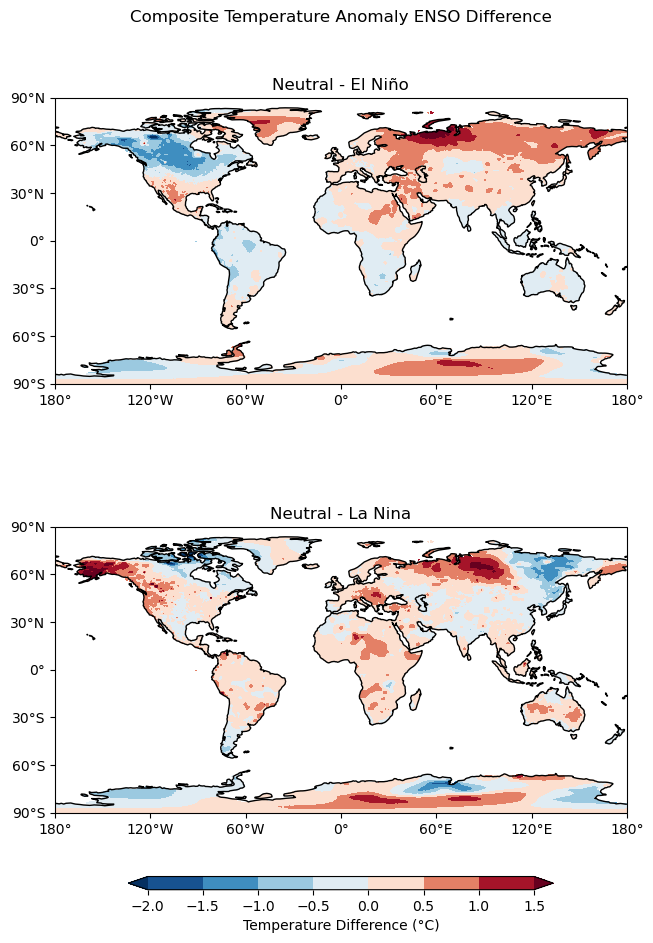

In [45]:
#Creating a multi-panel plot for the differences

labels=['Neutral - El Niño','Neutral - La Nina']
clevs = np.arange(-2,2,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))


axs = axs.flatten()
divnorm = TwoSlopeNorm(vmin=clevs.min(), vcenter=0, vmax=clevs.max())

for i, enso in enumerate(comp_diff):
        # Select the temperature variable from the dataset
        data = comp_diff[i]['air']

        # Add the cyclic point
        data, lons = add_cyclic_point(data, coord=comp_diff[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons, comp_diff[i]['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='RdBu_r', extend='both', norm=divnorm)

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Temperature Difference (°C)')

# Add a big title at the top
plt.suptitle('Composite Temperature Anomaly ENSO Difference') ;

Text(0.5, 0.98, 'Composite Temperature Differences Neutral-El Niño (p-value=0.05)')

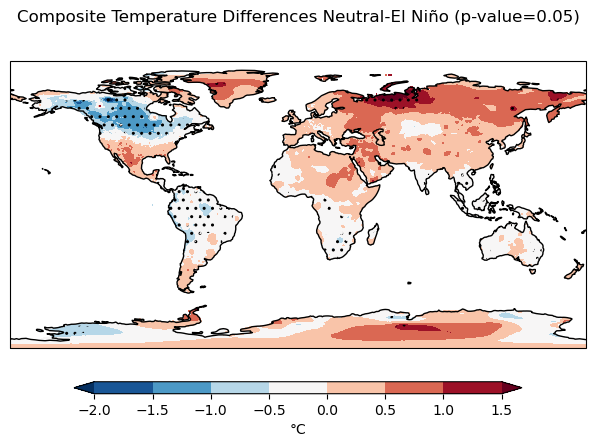

In [46]:
# Creating a significance test for the differences with a p-value of 0.05

from scipy.stats import ttest_ind

p = 0.05

# Extract numpy arrays from xarray.DataArrays
elnino_air_vals = da_anoms_air.sel(time=elnino.dropna(dim='time')['time'], method="nearest")['air'].values
lanina_air_vals = da_anoms_air.sel(time=lanina.dropna(dim='time')['time'], method="nearest")['air'].values
neutral_air_vals = da_anoms_air.sel(time=neutral.dropna(dim='time')['time'], method="nearest")['air'].values

# Perform t-tests
tstat1, pval1 = ttest_ind(elnino_air_vals, neutral_air_vals, equal_var=False)
tstat2, pval2 = ttest_ind(lanina_air_vals, neutral_air_vals, equal_var=False)

# Masking out all the data that does not meet conditions for p values
mask_diff1 = comp_diff[0].where(pval1 <= p)
mask_diff2 = comp_diff[1].where(pval2 <= p) 

mask_data1 = mask_diff1['air'].values


# Plot the difference between composites and also mark where it is significant 

labels=['El Nino vs. Neutral']
clevs = np.arange(-2, 2, 0.5)
hatch_levs = [0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

data = comp_diff[0]['air']

# Add the cyclic point
data, lons = add_cyclic_point(data, coord=comp_diff[0]['lon'].values)
mask_data1, lons = add_cyclic_point(mask_data1, coord=comp_diff[0]['lon'].values)
# Contour plot
cs = axs.contourf(lons, comp_diff[0]['lat'], data, clevs,
                  transform=ccrs.PlateCarree(),
                  cmap='RdBu_r', extend='both')

# Overlay of stippling
ss = axs.contourf(lons, comp_diff[0]['lat'], mask_data1, [0, 1],
                  transform=ccrs.PlateCarree(), colors=['None'],
                  hatches=['..', ''], extend='both', alpha=0.0)
# Add dots in hatches to add/remove density of dots

# Draw the coastlines for each subplot
axs.coastlines()

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='°C')

# Add a big title at the top
plt.suptitle('Composite Temperature Differences Neutral-El Niño (p-value=0.05)')


Text(0.5, 0.98, 'Composite Temperature Differences Neutral-La Niña (p-value = 0.05)')

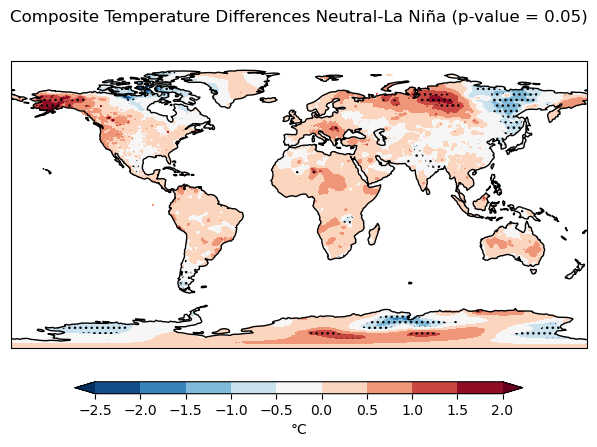

In [47]:
from scipy.stats import ttest_ind

p = 0.05

# Extract numpy arrays from xarray.DataArrays
elnino_air_vals = da_anoms_air.sel(time=elnino.dropna(dim='time')['time'], method="nearest")['air'].values
lanina_air_vals = da_anoms_air.sel(time=lanina.dropna(dim='time')['time'], method="nearest")['air'].values
neutral_air_vals = da_anoms_air.sel(time=neutral.dropna(dim='time')['time'], method="nearest")['air'].values

# Perform t-tests
tstat1, pval1 = ttest_ind(elnino_air_vals, neutral_air_vals, equal_var=False)
tstat2, pval2 = ttest_ind(lanina_air_vals, neutral_air_vals, equal_var=False)

# Masking out all the data that does not meet conditions for p values
mask_diff1 = comp_diff[0].where(pval1 <= p)
mask_diff2 = comp_diff[1].where(pval2 <= p)

mask_data2 = mask_diff2['air'].values


# Plot the difference between composites and also mark where it is significant 

labels=['El Nino vs. Neutral']
clevs = np.arange(-2.5, 2.5, 0.5)
hatch_levs = [0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

data = comp_diff[1]['air']

# Add the cyclic point
data, lons = add_cyclic_point(data, coord=comp_diff[1]['lon'].values)
mask_data2, lons = add_cyclic_point(mask_data2, coord=comp_diff[1]['lon'].values)
# Contour plot
cs = axs.contourf(lons, comp_diff[1]['lat'], data, clevs,
                  transform=ccrs.PlateCarree(),
                  cmap='RdBu_r', extend='both')

# Overlay of stippling
ss = axs.contourf(lons, comp_diff[1]['lat'], mask_data2, [0, 1],
                  transform=ccrs.PlateCarree(), colors=['None'],
                  hatches=['...', ''], extend='both', alpha=0.0)
# Add dots in hatches to add/remove density of dots

# Draw the coastlines for each subplot
axs.coastlines()

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='°C')

# Add a big title at the top
plt.suptitle('Composite Temperature Differences Neutral-La Niña (p-value = 0.05)')


In [48]:
# Creating a correlation 
r_map = xr.corr(ds_nino34['sst'], da_anoms_air['air'], dim='time')
r_map

<xarray.DataArray (lat: 360, lon: 720)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.02760698, -0.02760543, -0.02807062, ..., -0.02884722,
        -0.02827697, -0.02802885],
       [-0.02471207, -0.02471207, -0.02479247, ..., -0.02484861,
        -0.02496174, -0.02473047],
       [-0.00898306, -0.00909809, -0.00909811, ..., -0.00893973,
        -0.00898163, -0.00898166]])
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

Text(0.5, 1.0, 'Correlation between Nino3.4 and Temperature Anomalies')

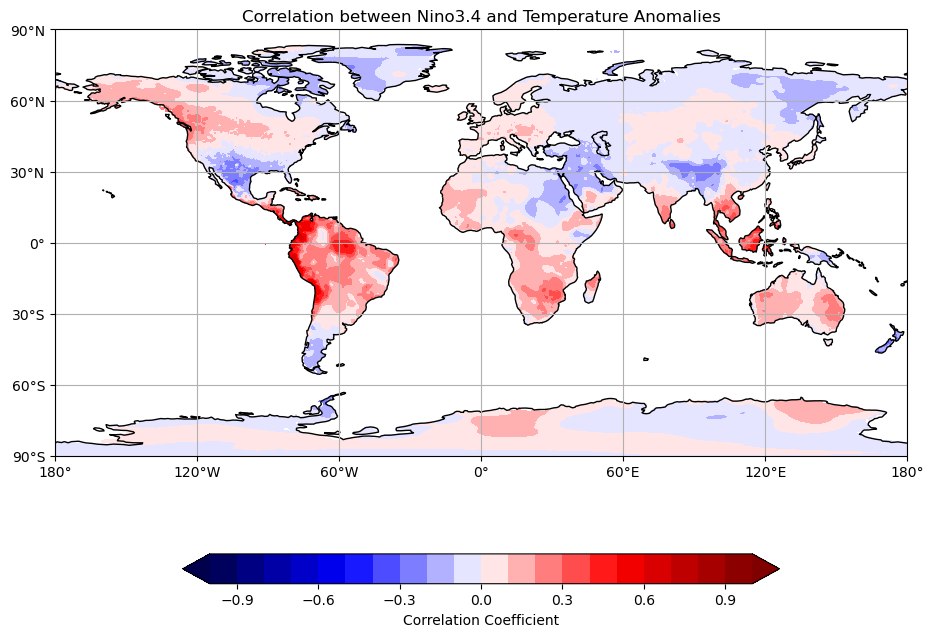

In [49]:


clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=da_anoms_air['lon'])
# Make a filled contour plot
cs=ax.contourf(lon,da_anoms_air['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='seismic',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

label_latlon(ax,np.arange(-180,181,60),np.arange(-90,91,30))

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Nino3.4 and Temperature Anomalies') 